In [1]:
import pandas as pd 

In [2]:
data = pd.read_parquet('fhv_tripdata_2021-01.parquet', engine='pyarrow')

In [3]:
data.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [4]:
data.shape

(1154112, 7)

In [5]:
df = data.copy()

In [6]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [7]:
df['duration'] = df['dropOff_datetime']-df['pickup_datetime']

In [8]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13


In [9]:
df['duration'].mean()

Timedelta('0 days 00:19:10.033445627')

In [10]:
df.isnull().sum()

dispatching_base_num            0
pickup_datetime                 0
dropOff_datetime                0
PUlocationID               958267
DOlocationID               162220
SR_Flag                   1154112
Affiliated_base_number        885
duration                        0
dtype: int64

In [11]:
df['duration'].value_counts()

0 days 00:15:00    5562
0 days 00:24:00    5236
0 days 00:10:00    5184
0 days 00:12:00    5042
0 days 00:08:45    4991
                   ... 
0 days 02:12:06       1
0 days 03:50:52       1
0 days 03:09:01       1
0 days 02:19:38       1
0 days 03:16:49       1
Name: duration, Length: 10824, dtype: int64

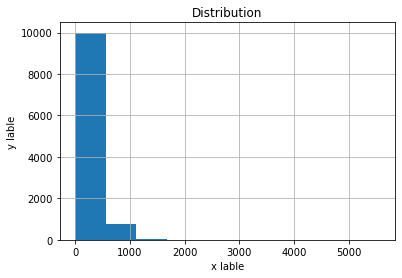

In [12]:
import matplotlib.pyplot as plt
df['duration'].value_counts().hist()
plt.title('Distribution')
plt.xlabel('x lable')
plt.ylabel('y lable')
plt.show()

In [13]:
import numpy as np

In [14]:
(df['duration'].value_counts()==1).sum()

3698

In [15]:
df['duration_minutes'] = df['duration'].dt.total_seconds().div(60).astype(int)

In [16]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration,duration_minutes
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,0 days 00:17:00,17
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,0 days 00:17:00,17
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,0 days 01:50:00,110
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,0 days 00:08:17,8
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,0 days 00:15:13,15


In [17]:
df = df[df['duration_minutes'].between(1, 60, inclusive=True)]

In [18]:
df.shape

(1110873, 9)

In [19]:
df.isnull().sum()/df.shape[0]

dispatching_base_num      0.000000
pickup_datetime           0.000000
dropOff_datetime          0.000000
PUlocationID              0.835194
DOlocationID              0.133386
SR_Flag                   1.000000
Affiliated_base_number    0.000696
duration                  0.000000
duration_minutes          0.000000
dtype: float64

In [20]:
df['PUlocationID'].fillna(-1, inplace=True)

In [21]:
df['DOlocationID'].fillna(-1, inplace=True)

In [22]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration,duration_minutes
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,0 days 00:17:00,17
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,0 days 00:17:00,17
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,0 days 00:08:17,8
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,0 days 00:15:13,15
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,0 days 00:09:03,9


In [23]:
df.drop(['dispatching_base_num', 'pickup_datetime','dropOff_datetime','SR_Flag','Affiliated_base_number','duration'], axis=1, inplace=True)

In [24]:
df.head()

,PUlocationID,DOlocationID,duration_minutes
0,-1.0,-1.0,17
1,-1.0,-1.0,17
3,-1.0,72.0,8
4,-1.0,61.0,15
5,-1.0,71.0,9


In [25]:
df.dtypes

PUlocationID        float64
DOlocationID        float64
duration_minutes      int32
dtype: object

In [26]:
df[['PUlocationID', 'DOlocationID']].dtypes

PUlocationID    float64
DOlocationID    float64
dtype: object

In [27]:
df[['PUlocationID', 'DOlocationID']]=df[['PUlocationID', 'DOlocationID']].astype(str)

In [28]:
df.dtypes

PUlocationID        object
DOlocationID        object
duration_minutes     int32
dtype: object

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
v = DictVectorizer()

In [31]:
X = df[['PUlocationID', 'DOlocationID']].to_dict('records')

In [32]:
X = v.fit_transform(X)

In [33]:
X

<1110873x525 sparse matrix of type '<class 'numpy.float64'>'
	with 2221746 stored elements in Compressed Sparse Row format>

In [34]:
v.feature_names_

['DOlocationID=-1.0',
 'DOlocationID=1.0',
 'DOlocationID=10.0',
 'DOlocationID=100.0',
 'DOlocationID=101.0',
 'DOlocationID=102.0',
 'DOlocationID=105.0',
 'DOlocationID=106.0',
 'DOlocationID=107.0',
 'DOlocationID=108.0',
 'DOlocationID=109.0',
 'DOlocationID=11.0',
 'DOlocationID=111.0',
 'DOlocationID=112.0',
 'DOlocationID=113.0',
 'DOlocationID=114.0',
 'DOlocationID=115.0',
 'DOlocationID=116.0',
 'DOlocationID=117.0',
 'DOlocationID=118.0',
 'DOlocationID=119.0',
 'DOlocationID=12.0',
 'DOlocationID=120.0',
 'DOlocationID=121.0',
 'DOlocationID=122.0',
 'DOlocationID=123.0',
 'DOlocationID=124.0',
 'DOlocationID=125.0',
 'DOlocationID=126.0',
 'DOlocationID=127.0',
 'DOlocationID=128.0',
 'DOlocationID=129.0',
 'DOlocationID=13.0',
 'DOlocationID=130.0',
 'DOlocationID=131.0',
 'DOlocationID=132.0',
 'DOlocationID=133.0',
 'DOlocationID=134.0',
 'DOlocationID=135.0',
 'DOlocationID=136.0',
 'DOlocationID=137.0',
 'DOlocationID=138.0',
 'DOlocationID=139.0',
 'DOlocationID=14.

In [35]:
target = 'duration_minutes'
y_train = df[target].values

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
lr.fit(X, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(X)

In [39]:
import seaborn as sns

C:\Users\saida\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saida\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


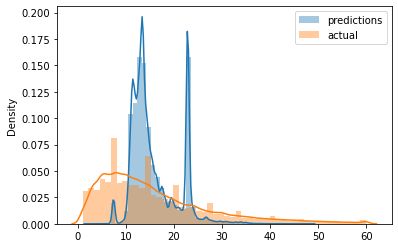

In [40]:
sns.distplot(y_pred, label = "predictions")
sns.distplot(y_train, label = "actual")
plt.legend()

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y_train, y_pred, squared = False)

10.595221845175795

In [43]:
def read_data(dataFile): 
    dataFile['duration'] = dataFile['dropOff_datetime']-dataFile['pickup_datetime']
    dataFile['duration_minutes'] = dataFile['duration'].dt.total_seconds().div(60).astype(int)
    dataFile = dataFile[dataFile['duration_minutes'].between(1, 60, inclusive=True)]
    dataFile['PUlocationID'].fillna(-1, inplace=True)
    dataFile['DOlocationID'].fillna(-1, inplace=True)
    dataFile.drop(['dispatching_base_num', 'pickup_datetime','dropOff_datetime','SR_Flag','Affiliated_base_number','duration'], axis=1, inplace=True)
    dataFile[['PUlocationID', 'DOlocationID']]=dataFile[['PUlocationID', 'DOlocationID']].astype(str)
    return dataFile

In [44]:
data_val = pd.read_parquet('fhv_tripdata_2021-02.parquet', engine='pyarrow')

In [45]:
df_val = data_val.copy()

In [46]:
df_val.shape

(1037692, 7)

In [47]:
read_data(df_val)

C:\Users\saida\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\saida\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\saida\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,PUlocationID,DOlocationID,duration_minutes
1,173.0,82.0,10
2,173.0,56.0,14
3,82.0,129.0,7
4,-1.0,225.0,13
5,-1.0,61.0,8
...,...,...,...
1037687,-1.0,31.0,13
1037688,-1.0,169.0,11
1037689,28.0,171.0,25
1037690,16.0,252.0,18


In [48]:
Val = df_val[['PUlocationID', 'DOlocationID']].to_dict('records')
Val_X = v.transform(Val)

In [49]:
Val

[{'PUlocationID': nan, 'DOlocationID': nan},
 {'PUlocationID': 173.0, 'DOlocationID': 82.0},
 {'PUlocationID': 173.0, 'DOlocationID': 56.0},
 {'PUlocationID': 82.0, 'DOlocationID': 129.0},
 {'PUlocationID': nan, 'DOlocationID': 225.0},
 {'PUlocationID': nan, 'DOlocationID': 61.0},
 {'PUlocationID': nan, 'DOlocationID': 26.0},
 {'PUlocationID': nan, 'DOlocationID': 72.0},
 {'PUlocationID': nan, 'DOlocationID': 244.0},
 {'PUlocationID': nan, 'DOlocationID': 169.0},
 {'PUlocationID': nan, 'DOlocationID': 161.0},
 {'PUlocationID': 13.0, 'DOlocationID': 182.0},
 {'PUlocationID': 152.0, 'DOlocationID': 244.0},
 {'PUlocationID': nan, 'DOlocationID': nan},
 {'PUlocationID': nan, 'DOlocationID': nan},
 {'PUlocationID': nan, 'DOlocationID': nan},
 {'PUlocationID': nan, 'DOlocationID': nan},
 {'PUlocationID': nan, 'DOlocationID': 265.0},
 {'PUlocationID': nan, 'DOlocationID': 237.0},
 {'PUlocationID': nan, 'DOlocationID': 248.0},
 {'PUlocationID': nan, 'DOlocationID': 248.0},
 {'PUlocationID': na

In [50]:
y_val = df_val[target].values

In [51]:
y_val

array([92, 10, 14, ..., 25, 18, 16])

In [52]:
y_pred_val = lr.predict(Val_X)

In [53]:
len(y_val)

1037692

In [54]:
len(y_pred_val)

1037692

In [55]:
mean_squared_error(y_val, y_pred_val, squared = False)

161.11465136824376

C:\Users\saida\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saida\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


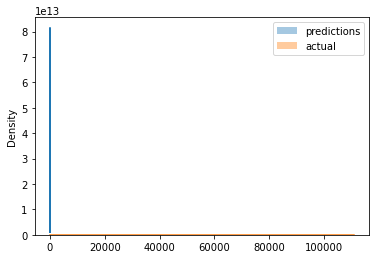

In [56]:
sns.distplot(y_pred_val, label = "predictions")
sns.distplot(y_val, label = "actual")
plt.legend()

It is clear that the model is not performant at all. However, in this task, i followed the instructions of the homework in https://github.com/DataTalksClub/mlops-zoomcamp/blob/main/01-intro/homework.md 